In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

beer_path = "output_data/craft_beer_nv.csv"
beer_df = pd.read_csv(beer_path)

census_path ="output_data/census_data_region.csv"
census_df = pd.read_csv(census_path)

beer_df.head()

,Name,id,Alcohol By Volume,International Bitterness Units,Standard Reference Method,Style,Category,Brewer,City,State,Latitude,Longitude,Region
0,Possession Porter,723,5.6,0,0,Porter,Irish Ale,Diamond Knot Brewery & Alehouse,Mukilteo,Washington,47.9485,-122.3050,West
1,Free Bike Amber,742,4.5,0,0,American-Style Amber/Red Ale,North American Ale,Skagit River Brewing,Mount Vernon,Washington,48.4192,-122.3350,West
2,Potrero ESB,3982,5.2,0,0,Special Bitter or Best Bitter,British Ale,21st Amendment Brewery Cafe,San Francisco,California,37.7825,-122.3930,West
3,Twisted Kilt Scotch Ale,4221,5.0,0,0,Scotch Ale,British Ale,Thirsty Dog Brewing,Akron,Ohio,41.0689,-81.5172,Midwest
4,HarvestÃ¶r Fresh Hop Ale,5243,7.2,0,0,American-Style Pale Ale,North American Ale,Lift Bridge Brewery,Stillwater,Minnesota,45.0565,-92.8222,Midwest


In [15]:
census_df.head()

,Region,Population,Median Age,Household Income
0,Midwest,"68,016,629",37.9,"$58,637"
1,Northeast,"63,014,129",40.2,"$68,906"
2,Southeast,"69,995,044",38.7,"$49,399"
3,Southwest,"40,842,451",36.9,"$53,816"
4,West,"67,496,301",37.3,"$65,294"


In [27]:
bps = beer_df.groupby(['Region']).count()['Name']
pps = census_df[['Region','Population']].groupby(['Region']).sum()
pps = pps["Population"].str.replace(",","").astype(float)
#pps = pps.rename(columns = {"Name":"State"})
#pps.index = pps["State"]
#pps["Breweries"] = bps
#pps["Breweries"] = pps["Breweries"].fillna(0)


corr_df = pd.DataFrame({"Breweries":bps,
                        "Population":pps
})
corr_df = corr_df.drop("Unknown")
corr_df

,Breweries,Population
Midwest,393,68016629.0
Northeast,663,63014129.0
Southeast,87,69995044.0
Southwest,83,40842451.0
West,652,67496301.0


The correlation between mouse weight and the average tumor volume is 0.42


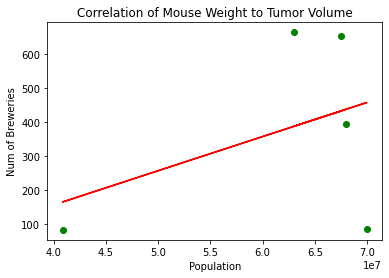

In [28]:
corr=round(st.pearsonr(corr_df['Population'],corr_df['Breweries'])[0],2)
print(f"The correlation between mouse weight and the average tumor volume is {corr}")
model = st.linregress(corr_df['Population'],corr_df['Breweries'])

y_values = corr_df['Population']*model[0]+model[1]
plt.scatter(corr_df['Population'],corr_df['Breweries'],color="g")
plt.plot(corr_df['Population'],y_values,color="red")
plt.xlabel('Population')
plt.ylabel('Num of Breweries')
plt.title("Correlation of Mouse Weight to Tumor Volume")
plt.show()